In [1]:
import sys
import os
workPath = os.path.abspath('..')
if not workPath in sys.path:
    sys.path.append(workPath)

In [2]:
import os
import numpy as np
import math

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from everest.window import Fetch, Reader

In [4]:
outputPath = '../out'
frameName = 'Nuftest8'

In [5]:
myreader = Reader(os.path.join(outputPath, frameName) + '.frm')

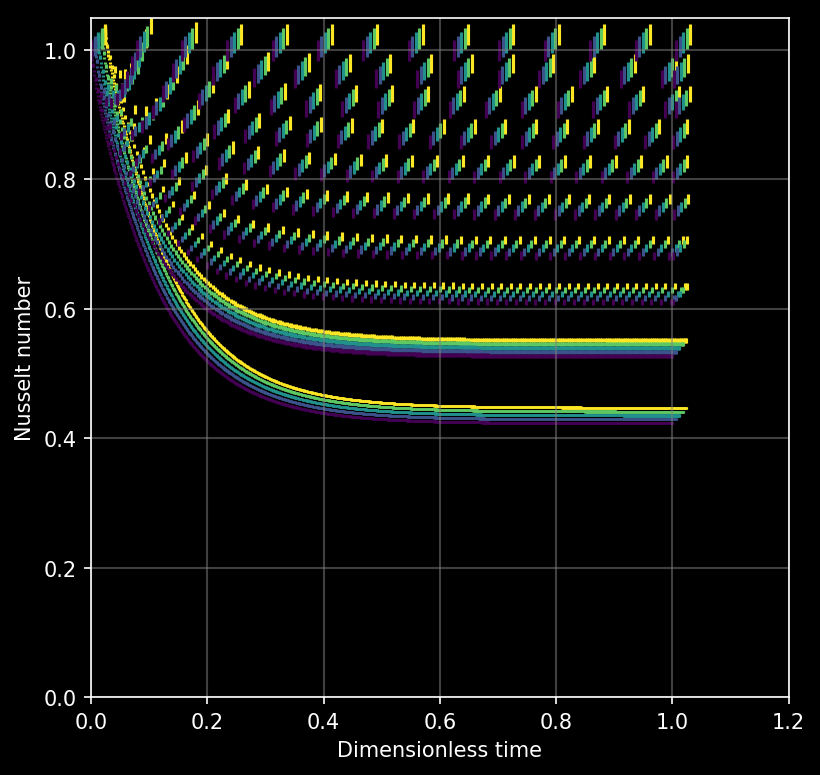

In [79]:
attrDict = myreader.view_attrs()
Ras = sorted(attrDict['Ra'].keys())
fs = sorted(attrDict['f'].keys())
# ress = sorted(attrDict['res'].keys())
ress = [8]

widthInches = 6
heightInches = 6

fig, ax = plt.subplots(
    figsize = (widthInches, heightInches), 
    dpi = 150,
    facecolor = 'black',
    edgecolor = 'black'
    )

mpl.rcParams.update({
    'text.color': "white",
    'axes.labelcolor': "white"
    })
ax.set_facecolor('black')
ax.grid(color = 'grey', linestyle = '-', linewidth = 1, alpha = 0.5)
ax.tick_params(color = 'white', labelcolor = 'white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_xlabel('Dimensionless time')
ax.set_ylabel('Nusselt number')
ax.set_xlim((0., 1.2))
ax.set_ylim((0., 1.05))

logRas = np.log(Ras)
cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(
    vmin = np.min(logRas),
    vmax = np.max(logRas)
    )

# resOffsets = {
#     8: 0,
#     64: 1.
#     }

for res in ress:
    resScope = attrDict['res'][res]
    for Ra in Ras[::-1]:
        RaScope = attrDict['Ra'][Ra]
        for f in fs:
            fScope = attrDict['f'][f]
            localScope = RaScope * fScope * resScope
            for scopelet in sorted(localScope):
                sysname = scopelet[0]
                observers = myreader[Fetch('system') == '_built_:' + sysname, Fetch('modeltime')]
                if len(observers):
                    modeltimes, Nus = myreader.pull(observers, ('modeltime', 'Nu'))
                    c = cmap(norm(math.log(Ra)))
                    scatter = ax.scatter(
                        modeltimes.flatten() + math.log10(Ra) / 1e2,
                        Nus.flatten() + math.log10(Ra) / 1e2,
                        c = [c for Nu in Nus],
                        s = 1e2 * f ** 2,
                        marker = '|',
                        alpha = 1.
                        )

In [7]:
ress = sorted(attrDict['res'].keys())
ress

[8, 64]

In [9]:
attrDict = myreader.view_attrs()
Ras = sorted(attrDict['Ra'].keys())
fs = sorted(attrDict['f'].keys())
# ress = sorted(attrDict['res'].keys())
ress = [8]

data = []
for res in ress:
    resScope = attrDict['res'][res]
    for Ra in Ras:
        RaScope = attrDict['Ra'][Ra]
        for f in fs:
            fScope = attrDict['f'][f]
            localScope = RaScope * fScope * resScope
            for scopelet in sorted(localScope):
                sysname = scopelet[0]
                observers = myreader[Fetch('system') == '_built_:' + sysname, Fetch('modeltime')]
                if len(observers):
                    modeltimes, Nus = myreader.pull(observers, ('modeltime', 'Nu'))
                    NuAv = np.average(Nus[-3])
                    data.append((res, Ra, f, NuAv))
data = np.array(data)

In [10]:
data.T

array([[8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        8.00000000e+00, 8.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00,

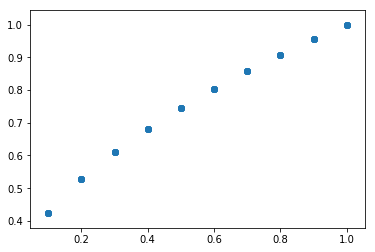

In [11]:
plt.scatter(data.T[2], data.T[3])

In [67]:
Nus = data.T[3]
fs = data.T[2]
logfs = np.log(data.T[2])
logNus = np.log(data.T[3])

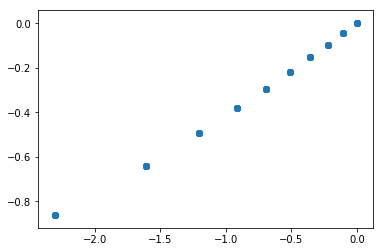

In [68]:
plt.scatter(logfs, logNus)

In [69]:
import numpy.polynomial.polynomial as poly

In [70]:
coefs = poly.polyfit(logfs, logNus, 1)
coefs

array([-0.01897162,  0.37826884])

In [77]:
fn_f = fs ** 0.378

In [78]:
coefs = poly.polyfit(fn_f, Nus, 1)
coefs

array([-0.01607403,  1.00260081])

In [ ]:
ffit = poly.Polynomial(coefs)    # instead of np.poly1d
plt.plot(logfs, ffit(logfs))

In [ ]:
math.e ** -0.575

In [ ]:
7 / 30

In [ ]:
10 ** 0.2

In [ ]:
len(mything)

In [17]:
1 / math.pi

0.3183098861837907

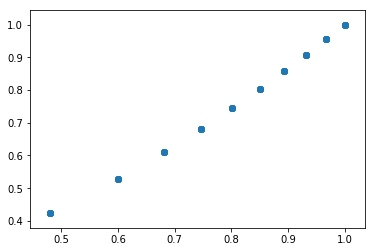

In [26]:
plt.scatter(data.T[2] ** (1. / math.pi), data.T[3])

In [33]:
Nus = data.T[3]
fs = data.T[2]
fn_f = fs ** (1. / math.pi)

In [34]:
coefs = poly.polyfit(fs, Nus, 1)

In [35]:
coefs

array([0.40928125, 0.62161316])

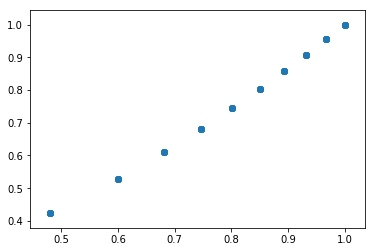

In [36]:
plt.scatter(fn_f, Nus)

In [41]:
np.log

<ufunc 'log'>

In [42]:
fn_f = 2 * np.pi / np.log(fs)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [60]:
fn_f = np.log(fs + 1) + 1. / 3.

In [61]:
coefs = poly.polyfit(fn_f, Nus, 1)
coefs

array([0.03712131, 0.94717721])

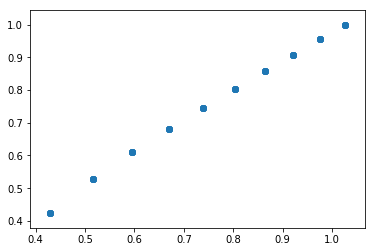

In [62]:
plt.scatter(fn_f, Nus)